## Description

This project aims to predict loan defaults using financial and demographic data. The model classifies borrowers as defaulters or non-defaulters based on features like income, loan amount, and credit history.



In [2]:
import os

base_path = "Data/CreditRisk"
csv_file = os.path.join(base_path, "CR.csv")

print("Full path:", os.path.abspath(csv_file))  # Print full path


import os
print(os.path.exists("/Users/stefano/Desktop/Masters Projects/GSOM.Projects/Data/CreditRisk/CR.csv"))



Full path: /Users/stefano/Desktop/Masters Projects/GSOM.Projects/CreditRisk/Data/CreditRisk/CR.csv
True


In [3]:
import pandas as pd
import os

base_path = "../Data/CreditRisk"
csv_file = os.path.join(base_path, "CR.csv")

data = pd.read_csv(csv_file)
print(data.head())  # Check if data loads correctly


   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  


## EDA

loan_status
0    25473
1     7108
dtype: int64


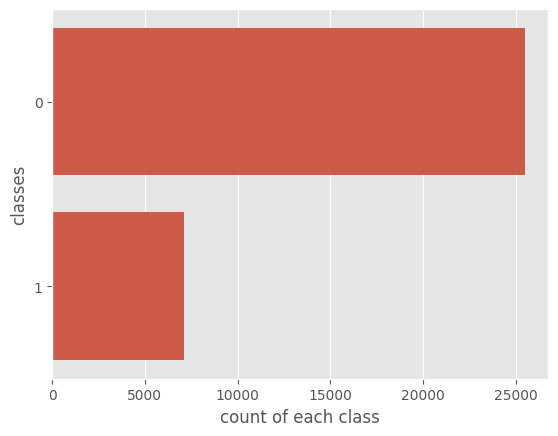

In [4]:
print(data.groupby('loan_status').size())

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

sns.countplot(y=data.loan_status ,data=data)
plt.xlabel("count of each class")
plt.ylabel("classes")
plt.show()

The dataset is inbalanced, have in consideration if the model is not good to try training with an artificially balanced dataset

In [5]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [6]:
data.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

We have a few null values on the interest rate, given that we have around 32,000 obs for simplicity I will remove the rows with null values in interest rate and emp_leng, if the analysis is heavily affected, I will consider filling up the values with the median.

In [7]:
data.dropna(inplace=True)
data.info(verbose=True)
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 28638 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  28638 non-null  int64  
 1   person_income               28638 non-null  int64  
 2   person_home_ownership       28638 non-null  object 
 3   person_emp_length           28638 non-null  float64
 4   loan_intent                 28638 non-null  object 
 5   loan_grade                  28638 non-null  object 
 6   loan_amnt                   28638 non-null  int64  
 7   loan_int_rate               28638 non-null  float64
 8   loan_status                 28638 non-null  int64  
 9   loan_percent_income         28638 non-null  float64
 10  cb_person_default_on_file   28638 non-null  object 
 11  cb_person_cred_hist_length  28638 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 2.8+ MB


person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [8]:
data.describe(include="all")

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
count,28638.000000,2.863800e+04,28638,28638.000000,28638,28638,28638.000000,28638.000000,28638.000000,28638.000000,28638,28638.000000
unique,NaN,NaN,4,NaN,6,7,NaN,NaN,NaN,NaN,2,NaN
top,NaN,NaN,RENT,NaN,EDUCATION,A,NaN,NaN,NaN,NaN,N,NaN
freq,NaN,NaN,14551,NaN,5704,9402,NaN,NaN,NaN,NaN,23535,NaN
mean,27.727216,6.664937e+04,NaN,4.788672,NaN,NaN,9656.493121,11.039867,0.216600,0.169488,NaN,5.793736
std,6.310441,6.235645e+04,NaN,4.154627,NaN,NaN,6329.683361,3.229372,0.411935,0.106393,NaN,4.038483
min,20.000000,4.000000e+03,NaN,0.000000,NaN,NaN,500.000000,5.420000,0.000000,0.000000,NaN,2.000000
25%,23.000000,3.948000e+04,NaN,2.000000,NaN,NaN,5000.000000,7.900000,0.000000,0.090000,NaN,3.000000
50%,26.000000,5.595600e+04,NaN,4.000000,NaN,NaN,8000.000000,10.990000,0.000000,0.150000,NaN,4.000000
75%,30.000000,8.000000e+04,NaN,7.000000,NaN,NaN,12500.000000,13.480000,0.000000,0.230000,NaN,8.000000


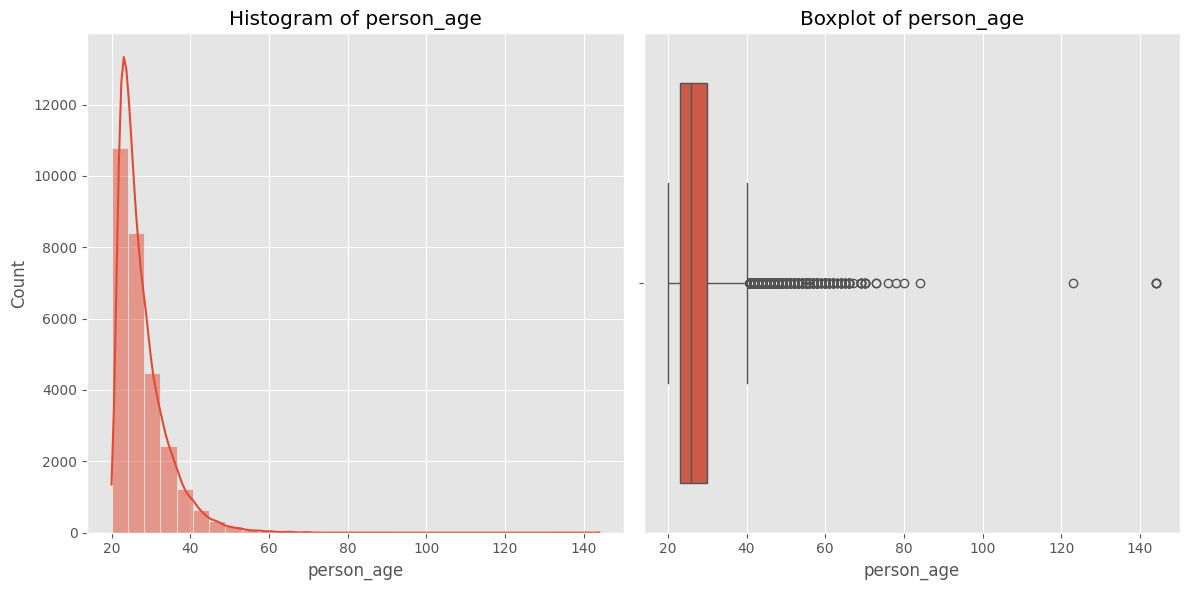

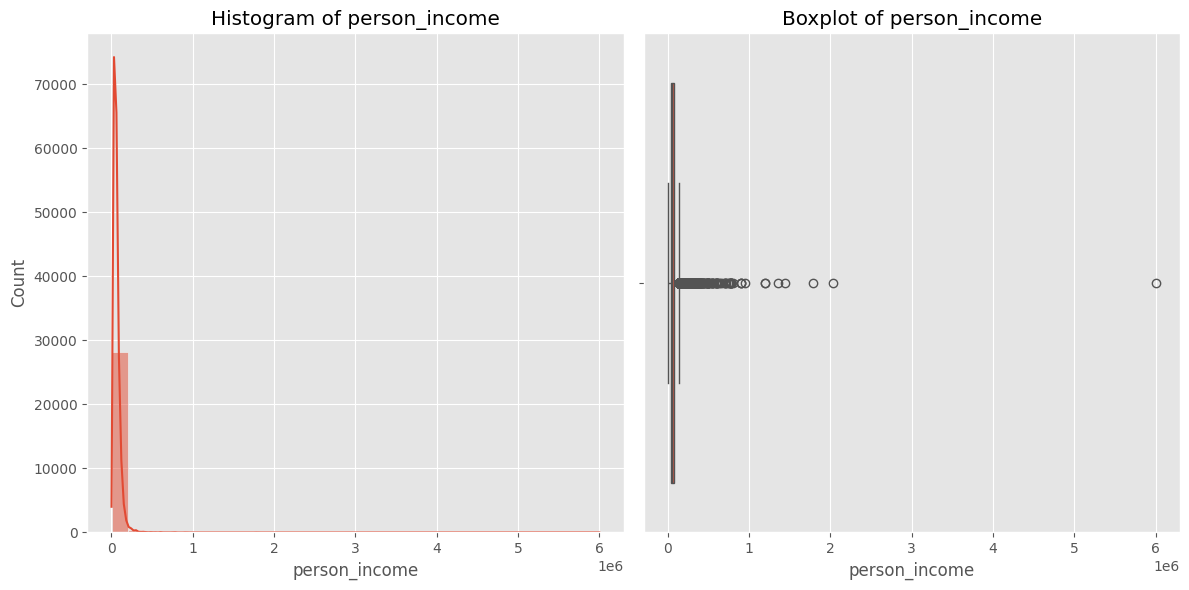

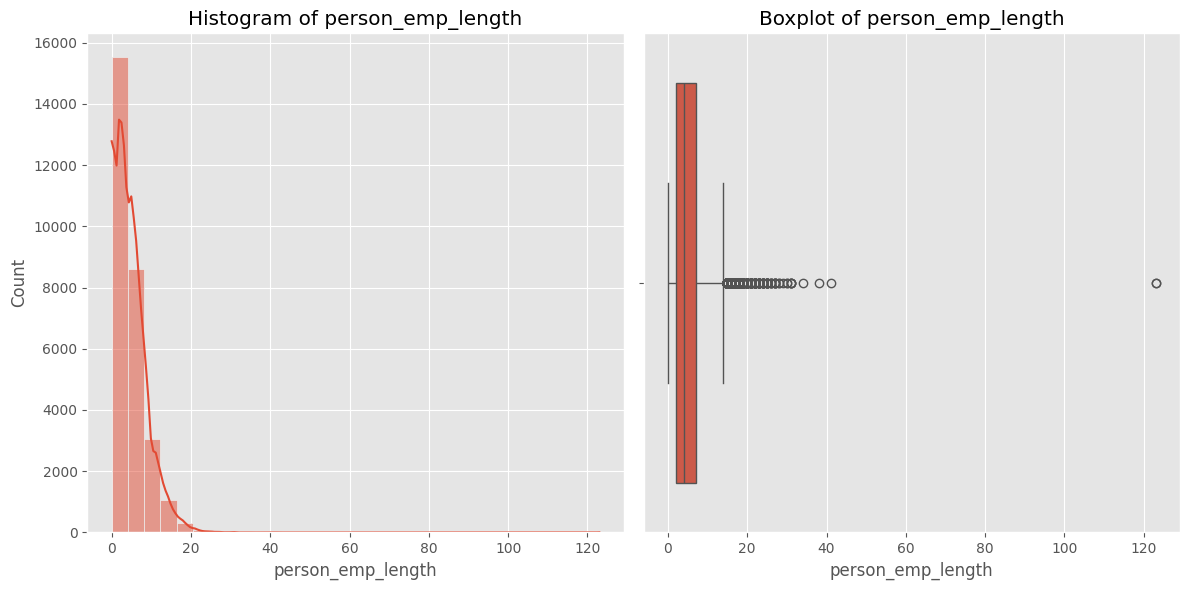

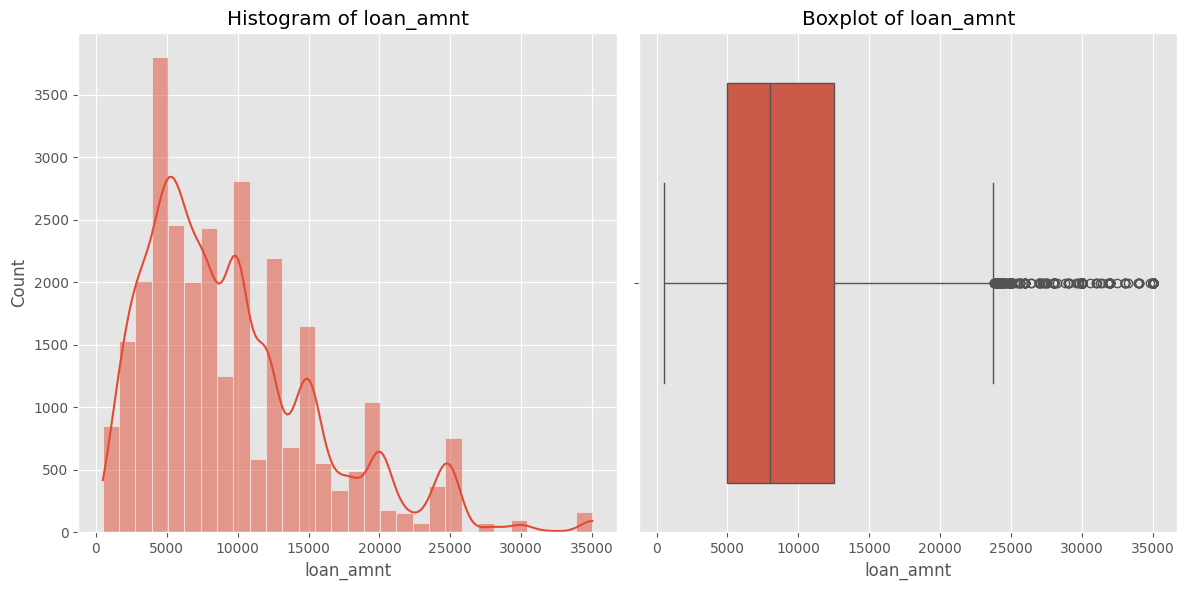

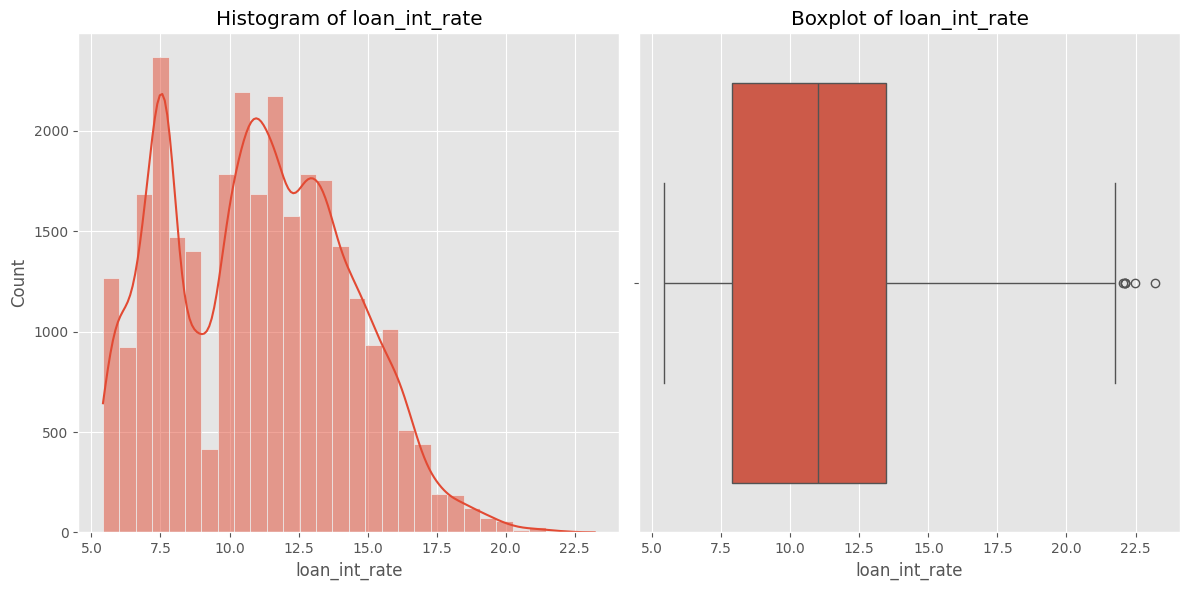

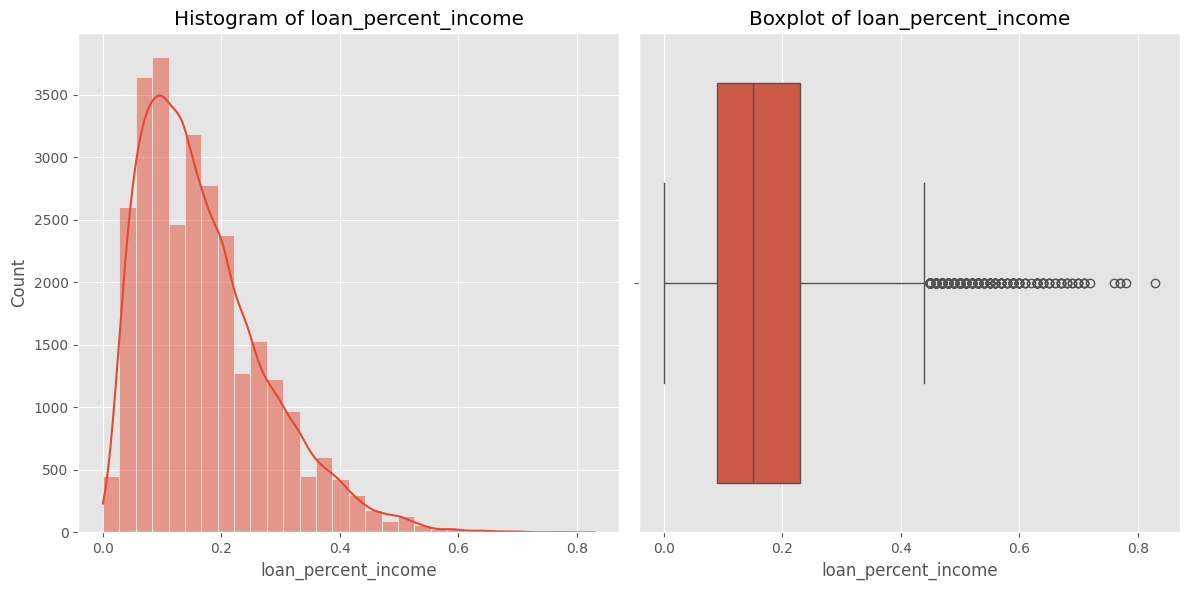

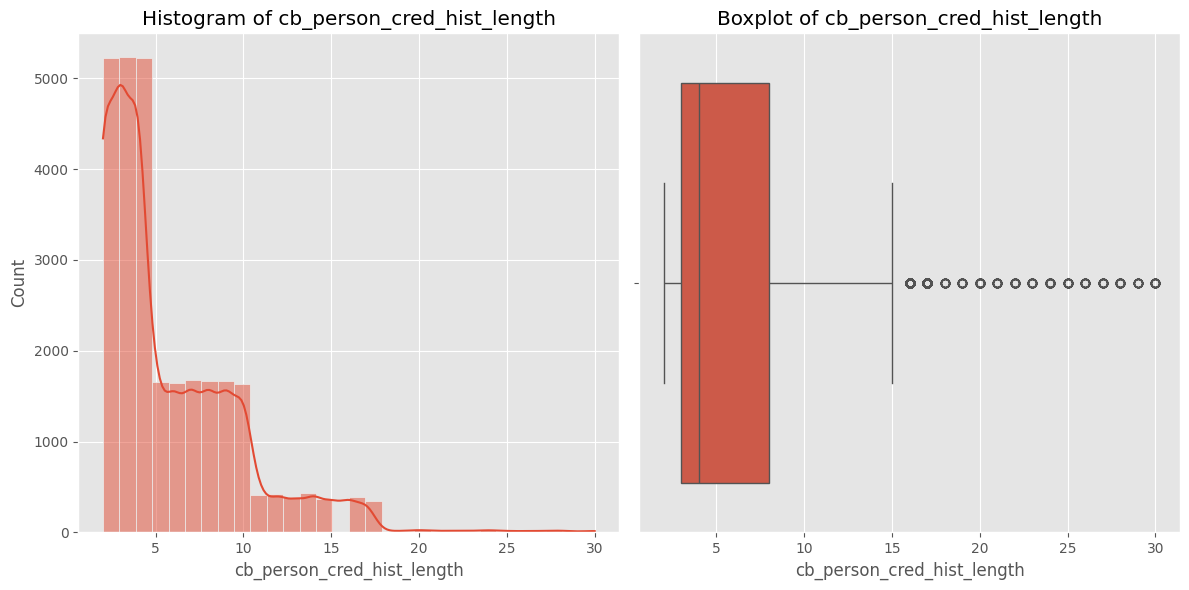

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

X = data.drop(columns=["loan_status"])  
y = data["loan_status"]
categorical_cols = ["loan_intent", "person_home_ownership", "loan_grade", "cb_person_default_on_file"]


columns_to_plot = [col for col in X.columns if col not in categorical_cols]


for col in columns_to_plot:
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))  

    
    sns.histplot(X[col], kde=True, ax=axs[0], bins=30)
    axs[0].set_title(f'Histogram of {col}')

 
    sns.boxplot(x=X[col], ax=axs[1])
    axs[1].set_title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()


I will standardize in order to observe the distribution better, I separete categoricals and numerical variables to only standardize the later

In [11]:
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# ✅ Define categorical and numerical variables
categorical_cols = ["loan_intent", "person_home_ownership", "loan_grade", "cb_person_default_on_file"]
numerical_cols = ["person_age", "person_income", "person_emp_length", 
                  "loan_amnt", "loan_int_rate", "loan_percent_income", 
                  "cb_person_cred_hist_length"]


X = data.drop(columns=["loan_status"])  
y = data["loan_status"]


encoder = OrdinalEncoder()
X[categorical_cols] = encoder.fit_transform(X[categorical_cols]).astype(int)  

scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])  


X_train, X_test, y_train, y_test = train_test_split(X, y,  
                                                    test_size=0.30, 
                                                    stratify=y,
                                                    random_state=123)  # Fix random seed for replicability


print(X.dtypes.value_counts())  
print(X_train.head())  


float64    7
int64      4
Name: count, dtype: int64
       person_age  person_income  person_home_ownership  person_emp_length  \
20834    0.677109      -0.299082                      3           0.050866   
30848    1.310991      -0.683973                      3           3.661362   
16856   -0.432183       0.310392                      3          -0.911932   
25147    0.518639       0.214106                      0           0.291566   
29586    2.103342      -0.760951                      3          -0.671233   

       loan_intent  loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
20834            0           1  -0.735673       0.139390            -0.653141   
30848            0           1   0.054270       0.253965             2.354642   
16856            4           2   0.844213       0.461439             0.004812   
25147            1           1  -0.340701       0.353057            -0.747134   
29586            3           3  -1.059549       1.687706            -0.183

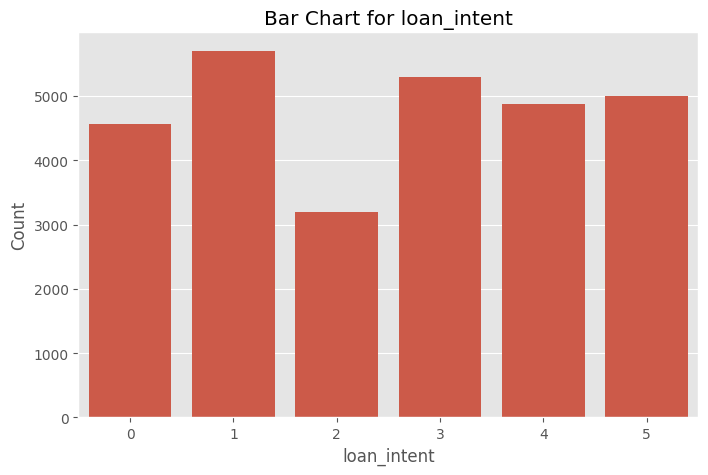

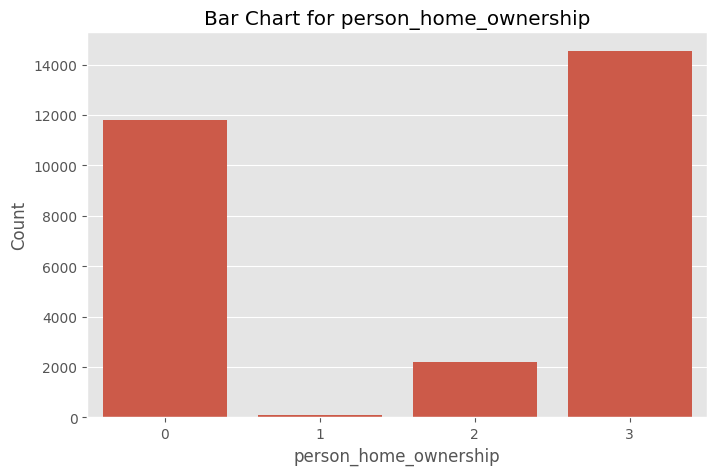

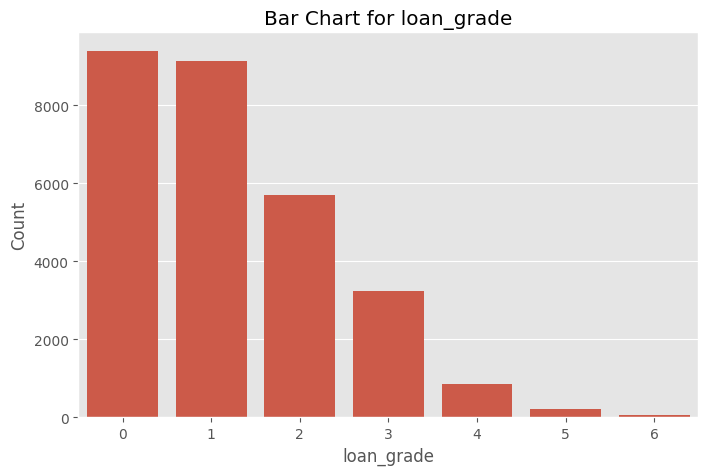

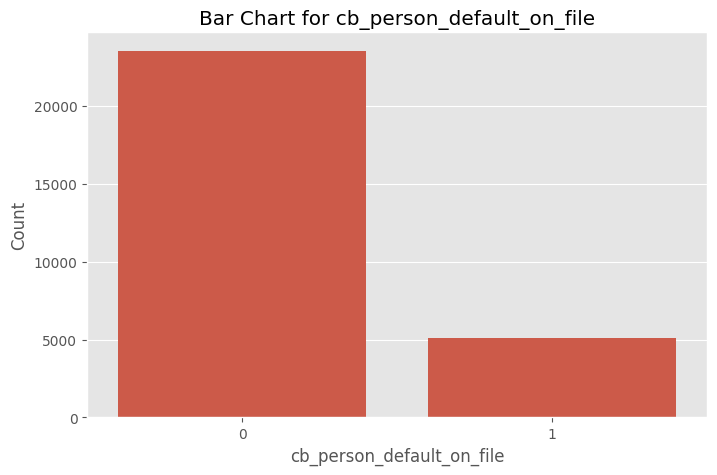

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_cols = ["loan_intent", "person_home_ownership", "loan_grade", "cb_person_default_on_file"]

for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    
    sns.countplot(x=X[col])

    plt.title(f'Bar Chart for {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


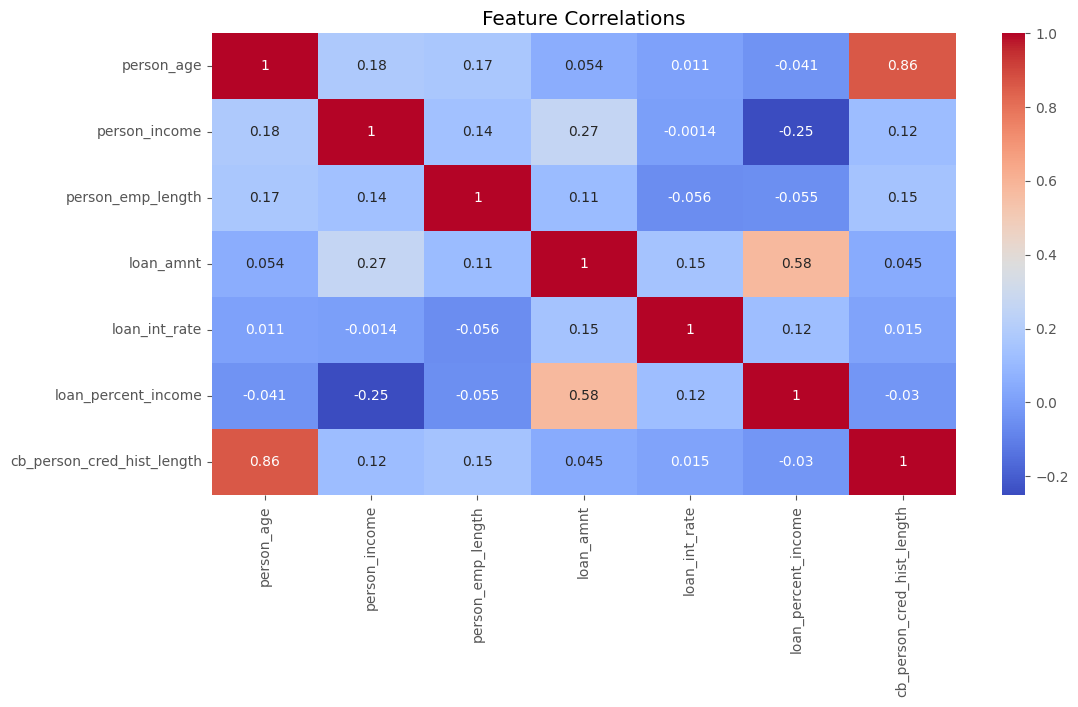

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.heatmap(X[numerical_cols].corr(), annot=True, cmap="coolwarm")

plt.title("Feature Correlations")
plt.show()


We have concluded with EDA, now I will continue with a logistic regression to classify by using a train test split. Depending on the results of the model the observed characteristics in the EDA will be revisited

## Logistic regression

This model was my first choice given 2 main reasons. For credit it is very important #1 to be able to explain credit decisions and #2 have tresholds of probailities to decide if the risk is high enough. Logistic regression can effectively tackle these challenges since it provides coefficients for feature significance and it outputs probabilities rather than 0 and 1, which is great to avoid balck and white risk assesment. 

In [14]:
#DEFINE YOUR CLASSIFIER and THE PARAMETERS GRID
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.model_selection import GridSearchCV

classifier = LogisticRegression()
parameters = {"C":[1e-2,1e-1,1],"penalty":['l2'] , "max_iter":[50000,10000]}


gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'recall', verbose=50, n_jobs=-1, refit=True)

gs = gs.fit(X_train, y_train)
print('***GRIDSEARCH RESULTS***')

print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3; 1/6] START C=0.01, max_iter=50000, penalty=l2..........................
[CV 3/3; 1/6] START C=0.01, max_iter=50000, penalty=l2..........................
[CV 2/3; 1/6] START C=0.01, max_iter=50000, penalty=l2..........................
[CV 3/3; 2/6] START C=0.01, max_iter=10000, penalty=l2..........................
[CV 2/3; 2/6] START C=0.01, max_iter=10000, penalty=l2..........................
[CV 1/3; 2/6] START C=0.01, max_iter=10000, penalty=l2..........................
[CV 1/3; 3/6] START C=0.1, max_iter=50000, penalty=l2...........................
[CV 2/3; 3/6] START C=0.1, max_iter=50000, penalty=l2...........................
[CV 2/3; 2/6] END C=0.01, max_iter=10000, penalty=l2;, score=0.440 total time=   0.0s
[CV 3/3; 2/6] END C=0.01, max_iter=10000, penalty=l2;, score=0.451 total time=   0.0s
[CV 2/3; 1/6] END C=0.01, max_iter=50000, penalty=l2;, score=0.440 total time=   0.1s
[CV 1/3; 2/6] END C=0.01, max_iter

In [15]:
best_model = gs.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)

print(gs.best_estimator_.coef_)
print(X_train.columns)

[[ 0.00837959  0.06791005  0.26691898 -0.0298242  -0.13541543  1.03440689
  -0.53360641 -0.15477908  1.23666827 -0.13907742  0.00677266]]
Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length'],
      dtype='object')


In [16]:
from sklearn import metrics

print('***RESULTS ON TRAIN SET***')
print("f1_score: ", metrics.f1_score(y_train, y_pred_train))
print("--")
print('***RESULTS ON TEST SET***')
print("f1_score: ", metrics.f1_score(y_test, y_pred))

***RESULTS ON TRAIN SET***
f1_score:  0.5697445972495089
--
***RESULTS ON TEST SET***
f1_score:  0.5576282478347768


In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.91      6731
           1       0.73      0.45      0.56      1861

    accuracy                           0.85      8592
   macro avg       0.80      0.70      0.73      8592
weighted avg       0.83      0.85      0.83      8592



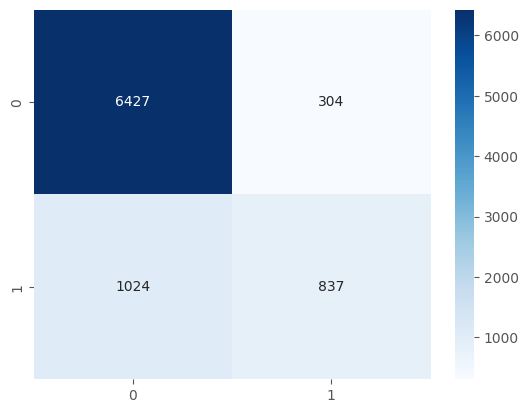

In [18]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues"); #annot=True to annotate cells fmt: format


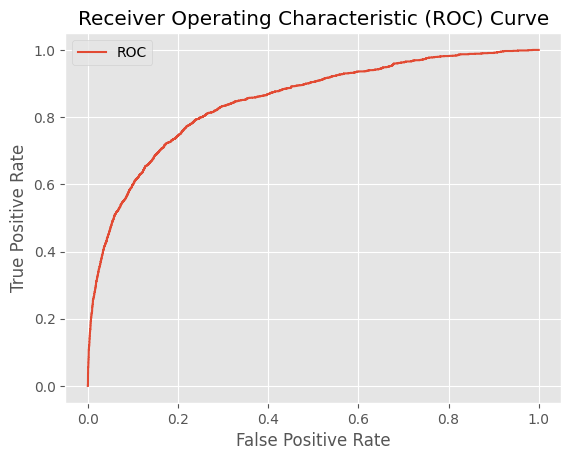

AUC: 0.85


In [19]:
from sklearn import metrics

model = LogisticRegression(C=0.01,solver='newton-cg')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

y_probs = model.predict_proba(X_test) 

fpr, tpr, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC: %.2f' % auc)

In [20]:
model.coef_

array([[ 0.00393013, -0.07411522,  0.26387425, -0.03504284, -0.12841468,
         0.82513565, -0.37854574,  0.04333482,  1.06893638, -0.07600422,
         0.0104355 ]])

In [21]:
list(zip(X_train.columns, model.coef_[0,:]))

[('person_age', np.float64(0.00393013288120185)),
 ('person_income', np.float64(-0.07411521669860568)),
 ('person_home_ownership', np.float64(0.26387425367195233)),
 ('person_emp_length', np.float64(-0.03504283683045036)),
 ('loan_intent', np.float64(-0.1284146795437396)),
 ('loan_grade', np.float64(0.8251356515419728)),
 ('loan_amnt', np.float64(-0.3785457418443624)),
 ('loan_int_rate', np.float64(0.04333482361079072)),
 ('loan_percent_income', np.float64(1.068936381689506)),
 ('cb_person_default_on_file', np.float64(-0.07600421934888571)),
 ('cb_person_cred_hist_length', np.float64(0.010435502422445564))]

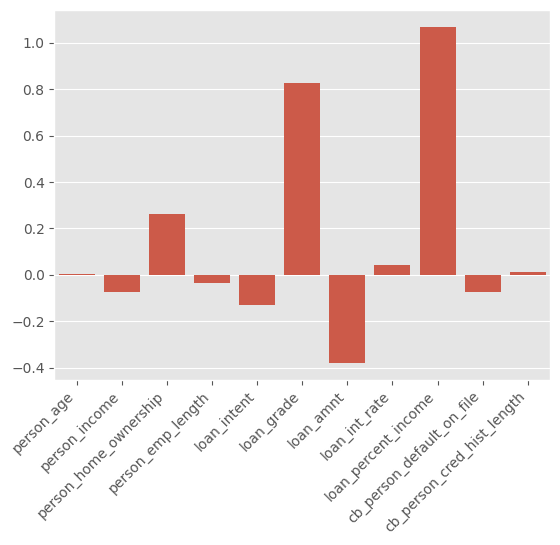

In [22]:
sns.barplot(x=X_train.columns, y=model.coef_[0,:],)
plt.xticks(rotation=45, ha="right")
plt.xlabel("")
plt.show()

The general model seems to have a good f1 score and AUC, however in the context of credit risk, this is not a strong model because you have a lot of false negative for defaulters. this is likely due to the model being unbalance

Given my suspicions on the underperformance due to the balance I will reapply the model with a balanced data implementation using class_weight = 'balanced'

In [23]:
#DEFINE YOUR CLASSIFIER and THE PARAMETERS GRID
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.model_selection import GridSearchCV

classifier = LogisticRegression(class_weight='balanced')
parameters = {"C":[1e-2,1e-1,1],"penalty":['l2'] , "max_iter":[50000,10000]}


gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'recall', verbose=50, n_jobs=-1, refit=True)

gs = gs.fit(X_train, y_train)
print('***GRIDSEARCH RESULTS***')

print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3; 1/6] START C=0.01, max_iter=50000, penalty=l2..........................
[CV 2/3; 1/6] START C=0.01, max_iter=50000, penalty=l2..........................
[CV 3/3; 1/6] START C=0.01, max_iter=50000, penalty=l2..........................
[CV 1/3; 2/6] START C=0.01, max_iter=10000, penalty=l2..........................
[CV 2/3; 2/6] START C=0.01, max_iter=10000, penalty=l2..........................
[CV 1/3; 1/6] END C=0.01, max_iter=50000, penalty=l2;, score=0.784 total time=   0.0s
[CV 3/3; 2/6] START C=0.01, max_iter=10000, penalty=l2..........................
[CV 2/3; 1/6] END C=0.01, max_iter=50000, penalty=l2;, score=0.780 total time=   0.0s
[CV 3/3; 1/6] END C=0.01, max_iter=50000, penalty=l2;, score=0.778 total time=   0.0s
[CV 1/3; 3/6] START C=0.1, max_iter=50000, penalty=l2...........................
[CV 1/3; 2/6] END C=0.01, max_iter=10000, penalty=l2;, score=0.784 total time=   0.0s
[CV 2/3; 3/6] START C=0.1, ma

Much higher f1, which is good news therefore I will repeat the analysis with this new model to check if it is actually better or we just achieved overfitting give the way class_weight is implemented.

In [24]:
best_model = gs.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)

print(gs.best_estimator_.coef_)
print(X_train.columns)

[[-0.0083372  -0.03513155  0.2073526   0.00156975 -0.13698483  0.85354072
  -0.44210181  0.03561862  1.10126725 -0.07711097  0.01360513]]
Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length'],
      dtype='object')


In [25]:
print('***RESULTS ON TRAIN SET***')
print("f1_score: ", metrics.f1_score(y_train, y_pred_train))
print("--")
print('***RESULTS ON TEST SET***')
print("f1_score: ", metrics.f1_score(y_test, y_pred))

***RESULTS ON TRAIN SET***
f1_score:  0.6103861038610386
--
***RESULTS ON TEST SET***
f1_score:  0.6009310198899703


In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85      6731
           1       0.50      0.76      0.60      1861

    accuracy                           0.78      8592
   macro avg       0.71      0.77      0.72      8592
weighted avg       0.83      0.78      0.79      8592



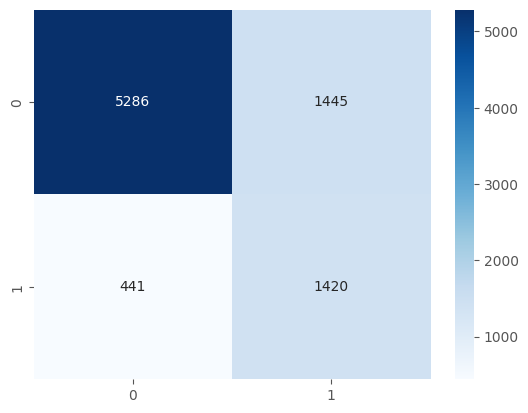

In [27]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues"); #annot=True to annotate cells fmt: format


In [28]:
model.coef_

array([[ 0.00393013, -0.07411522,  0.26387425, -0.03504284, -0.12841468,
         0.82513565, -0.37854574,  0.04333482,  1.06893638, -0.07600422,
         0.0104355 ]])

In [29]:
list(zip(X_train.columns, model.coef_[0,:]))

[('person_age', np.float64(0.00393013288120185)),
 ('person_income', np.float64(-0.07411521669860568)),
 ('person_home_ownership', np.float64(0.26387425367195233)),
 ('person_emp_length', np.float64(-0.03504283683045036)),
 ('loan_intent', np.float64(-0.1284146795437396)),
 ('loan_grade', np.float64(0.8251356515419728)),
 ('loan_amnt', np.float64(-0.3785457418443624)),
 ('loan_int_rate', np.float64(0.04333482361079072)),
 ('loan_percent_income', np.float64(1.068936381689506)),
 ('cb_person_default_on_file', np.float64(-0.07600421934888571)),
 ('cb_person_cred_hist_length', np.float64(0.010435502422445564))]

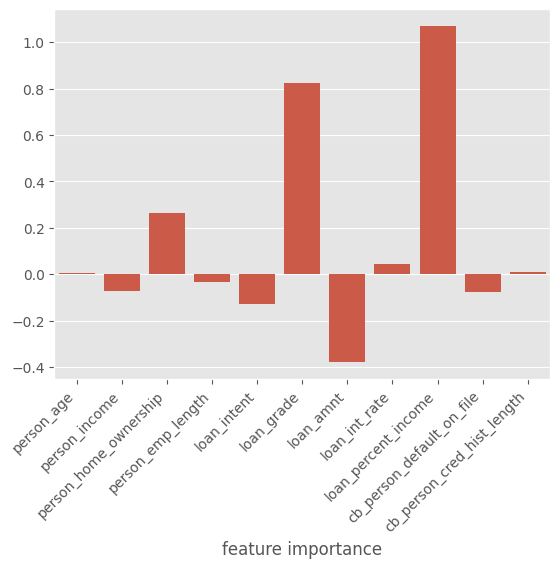

In [30]:
sns.barplot(x=X_train.columns, y=model.coef_[0,:],)
plt.xticks(rotation=45, ha="right")
plt.xlabel("feature importance")
plt.show()

This model performs much better, the scores are much better at classifying correctly true negatives, however there is a slight trade off since the recall on non-defaulters is slightly worse, but in the context of credit risk is much more useful as an overall model. 

Even with the slight trade-off in recall, the model is still more useful as a whole because it reduces the chances of approving a risky borrower (false negatives), which is crucial for financial institutions. In terms of financial stability and risk management, having a model that better identifies true negatives (non-defaulters) is a stronger predictor of low-risk loans.

## Feature importance on the balanced model 
loan_grade: 0.825
This feature has the highest weight. It suggests that the grade of the loan plays a significant role in predicting defaults, which is expected since loan grade typically reflects the riskiness of the loan.


loan_percent_income: 1.068
This feature indicates the percentage of the borrower's income that is used to service the loan. A higher value suggests greater financial strain, and the model clearly finds this highly important for predicting default risk.


loan_amnt: -0.378
The loan amount is a critical predictor, with higher loan amounts generally increasing the risk of default. The negative sign indicates that higher loan amounts are associated with a higher risk of default.


person_income: -0.074
Although income plays a role, it has a relatively low impact compared to loan features. The negative value indicates that higher income correlates slightly with a lower likelihood of default, but its influence is much weaker than that of loan-related features.

cb_person_cred_hist_length: 0.010
The credit history length has a small positive impact, indicating that longer credit histories are slightly associated with a lower risk of default. However, this feature has one of the smallest weights in the model, indicating that it's less significant compared to others.
Ownership and Intent Features:

person_home_ownership: 0.263
Homeownership status appears to have a moderately high impact. Homeownership often correlates with financial stability, so homeowners are likely seen as less risky.

loan_intent: -0.128
Loan intent has a slightly negative impact, suggesting that certain types of loan intent might be correlated with a higher risk of default. This could reflect the purpose of the loan, e.g., people using loans for more speculative purposes might be at higher risk.

loan_int_rate: 0.043
The interest rate on the loan has a moderate positive impact, as higher rates generally reflect higher risk.

cb_person_default_on_file: -0.076
This indicates a slight negative relationship between default history and the likelihood of current default, which could be interpreted as prior defaulters having a slightly lower risk now.